In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

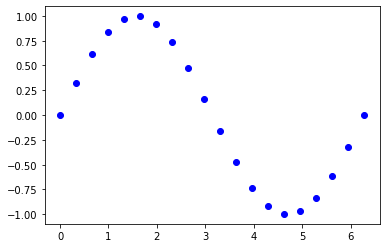

In [2]:
x_train=np.linspace(0,np.pi*2,20)
yd_train=np.array(np.sin(x_train))
plt.plot(x_train,yd_train,'bo')
plt.show()

In [3]:
modelo=keras.models.Sequential()
modelo.add(keras.layers.Dense(10,input_shape=(1,),activation='tanh')) #10 es la n° de capa oculta
modelo.add(keras.layers.Dense(10,activation='tanh'))
modelo.add(keras.layers.Dense(1,activation='linear'))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


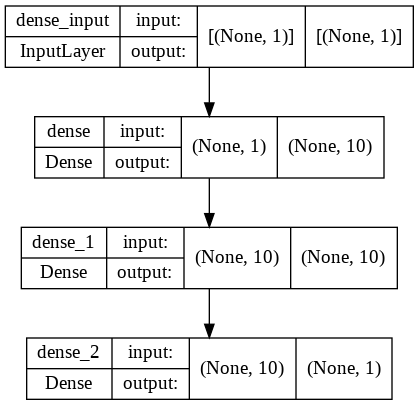

In [4]:
keras.utils.plot_model(modelo, "RNA_Seno.png", show_shapes=True)

In [5]:
#odelo.compile('adam','mse',metrics=['mse'])
#modelo.compile(keras.optimizers.SGD(learning_rate=0.01, momentum=0.01, nesterov=True),'mse',metrics=['mse'])
modelo.compile(keras.optimizers.Adam(),'mse',metrics=['mse'])


In [6]:
historia=modelo.fit(x_train,yd_train,epochs=5000,verbose=0)

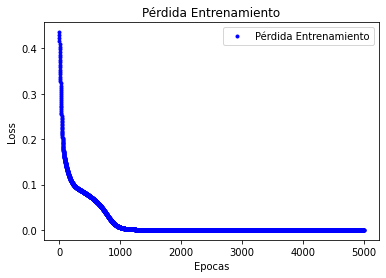

In [7]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b.', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
modelo.evaluate(x_train,yd_train)

1/1 [==============================] - 0s 202ms/step - loss: 3.7236e-06 - mse: 3.7236e-06


[3.7236357002257137e-06, 3.7236357002257137e-06]

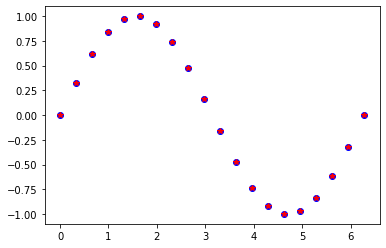

In [9]:
yd_pred=modelo.predict(x_train)
plt.plot(x_train,yd_train,'bo',x_train,yd_pred,'r*')
plt.show()

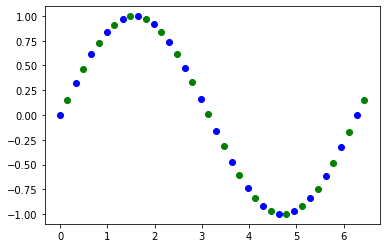

In [10]:
xval=np.linspace(np.pi*0.05,np.pi*2+np.pi*0.05,20)
yval=np.array(np.sin(xval))
plt.plot(x_train,yd_train,'bo',xval,yval,'go')
plt.show()

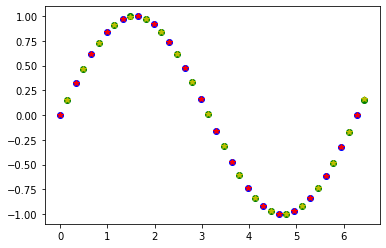

In [11]:
predval=modelo.predict(xval)
plt.plot(x_train,yd_train,'bo',x_train,yd_pred,'r*',xval,yval,'go',xval,predval,'y*')
plt.show()

In [12]:
Wco = modelo.layers[0].get_weights()[0]
print(Wco.shape)
print(Wco)
bco = modelo.layers[0].get_weights()[1]
print(bco.shape)
print(bco)


(1, 10)
[[ 0.16725309  0.3422074   0.3715137  -0.7780725  -0.83789176  0.38092116
   0.37265587  1.0010232  -0.19372182  0.1475519 ]]
(10,)
[-0.6950047  -0.2638075  -0.5025939  -0.05994266 -0.1043001  -0.47520658
 -0.38278714 -0.52416766  0.9067017  -0.00261913]


In [13]:
Wcs = modelo.layers[1].get_weights()[0]
print(Wcs.shape)
print(Wcs)
bcs = modelo.layers[1].get_weights()[1]
print(bcs.shape)
print(bcs)

(10, 10)
[[-0.3620282  -0.82155454 -1.0676931  -0.26833686  0.4608386   0.63460743
  -0.92884815 -0.46516198 -0.7426438  -0.88041383]
 [ 0.27631068 -0.22466983  0.04818325  0.38691232  0.16077882 -0.63819736
  -0.35782346  0.44823197 -0.7923627   0.3414373 ]
 [-0.34756163 -0.8679231   0.5681576  -0.02530061  0.6248897  -0.5579798
  -0.7773587  -0.03570212 -0.14117971  0.1281899 ]
 [-0.5943457  -0.9156731   0.56780237  0.322812    0.07096003 -0.730886
  -0.48574758  0.40822792  0.27836943 -0.24796905]
 [-0.5433865  -0.92953736 -0.32550618  0.04618247 -0.54049414 -0.2657969
  -0.62890714 -0.32035014 -0.43533152 -0.05862442]
 [-0.05016417 -0.57378745  0.4084285   0.36973852  0.7340206  -0.76337177
  -0.32681972  0.41365457 -0.24459259  0.20258854]
 [-0.6057802  -0.7938024   0.39892974 -0.3325301   0.8184882  -0.45304874
  -0.7050699   0.6438664  -0.16909349  0.3458141 ]
 [-0.2055339   0.03312774  0.10931639  0.12986691 -0.1660742   0.3667047
   0.73636806 -0.7328735   0.60195863 -0.092833